# Spotify Data

In [1]:
import pandas as pd

In [19]:
names = ['Position', 'Track Name', 'Artist', 'Streams', 'URL']
data = pd.read_csv('spotify.csv', names=names)

In [103]:
data.head(60)

,Position,Track Name,Artist,Streams,URL
0,1,ROCKSTAR (feat. Roddy Ricch),DaBaby,3895916,https://open.spotify.com/track/7ytR5pFWmSjzHJI...
1,2,Rain On Me (with Ariana Grande),Lady Gaga,3073999,https://open.spotify.com/track/7ju97lgwC2rKQ6w...
2,3,Blinding Lights,The Weeknd,2587402,https://open.spotify.com/track/0VjIjW4GlUZAMYd...
3,4,Toosie Slide,Drake,2347217,https://open.spotify.com/track/466cKvZn1j45Ipx...
4,5,Roses - Imanbek Remix,SAINt JHN,2165427,https://open.spotify.com/track/24Yi9hE78yPEbZ4...
5,6,Rover (feat. DTG),S1mba,2120778,https://open.spotify.com/track/4slSrbTK1sNK4I1...
6,7,Dinner Guest (feat. MoStack),AJ Tracey,1924099,https://open.spotify.com/track/5y0ekFHNfFbjKhZ...
7,8,I Dunno (feat. Dutchavelli & Stormzy),Tion Wayne,1921789,https://open.spotify.com/track/3B0WbRucJ6ZIla2...
8,9,death bed (coffee for your head) (feat. beabad...,Powfu,1753808,https://open.spotify.com/track/7eJMfftS33KTjuF...
9,10,Breaking Me,Topic,1730798,https://open.spotify.com/track/3H7ihDc1dqLriiW...


# How many times does Ed Sheeran appear as the artist?

In [21]:
data[data['Artist'] == 'Ed Sheeran']

,Position,Track Name,Artist,Streams,URL
95,96,I Don't Care (with Justin Bieber),Ed Sheeran,536363,https://open.spotify.com/track/0hVXuCcriWRGvwM...
108,109,Beautiful People (feat. Khalid),Ed Sheeran,508872,https://open.spotify.com/track/70eFcWOvlMObDhU...
113,114,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,496537,https://open.spotify.com/track/4vUmTMuQqjdnvlZ...


# How many times does Drake appear as the artist?

In [22]:
data[data['Artist'] == 'Drake']

,Position,Track Name,Artist,Streams,URL
3,4,Toosie Slide,Drake,2347217,https://open.spotify.com/track/466cKvZn1j45Ipx...
69,70,Chicago Freestyle (feat. Giveon),Drake,639706,https://open.spotify.com/track/4wVOKKEHUJxHCFF...
176,177,Nice For What,Drake,377970,https://open.spotify.com/track/3CA9pLiwRIGtUBi...


# Is the average chart position of Drake better than the average chart positon of Ed Sheeran?

In [26]:
data['Position'].mean()

100.5

In [32]:
data.groupby(data['Artist'])['Position'].mean().head()

Artist
220 KID       19.0
24kGoldn     142.0
6ix9ine       33.0
AJ Tracey     35.5
Aitch        103.6
Name: Position, dtype: float64

In [49]:
Ed = data[data['Artist'] == 'Ed Sheeran'].mean()

In [47]:
Drake = data[data['Artist'] == 'Drake'].mean()

In [58]:
Drake > Ed

Position    False
Streams      True
dtype: bool

# Plot Streams against Position

## This is the same thing!

In [51]:
%matplotlib inline

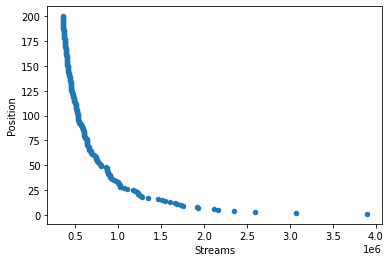

In [54]:
data.plot(kind='scatter', x='Streams', y='Position')

# Who appears as the artist most times in the top 200?

## This doesnt work because its showing the last item in every category

In [66]:
data.sort_values(by='Artist').max()

Position                                                    200
Track Name                                when the party's over
Artist                                                  iLL BLU
Streams                                                 3895916
URL           https://open.spotify.com/track/7ytR5pFWmSjzHJI...
dtype: object

## This is a path to finding the answer

In [95]:
data[data['Artist'] == 'Stormzy'].count()

Position      2
Track Name    2
Artist        2
Streams       2
URL           2
dtype: int64

In [75]:
data['Artist'].value_counts().sort_index().head(50)

220 KID                     1
24kGoldn                    1
6ix9ine                     1
AJ Tracey                   2
Aitch                       5
Anne-Marie                  1
Ariana Grande               1
Arizona Zervas              1
Ava Max                     2
Avicii                      1
BENEE                       1
Becky Hill                  1
Bill Withers                1
Billie Eilish               4
Bob Marley & The Wailers    1
Bryan Adams                 1
Calvin Harris               2
Childish Gambino            1
Chris Brown                 1
DaBaby                      1
Dave                        3
Daði Freyr                  1
Doja Cat                    3
Dominic Fike                1
Don Toliver                 1
Drake                       3
DripReport                  1
Dua Lipa                    3
Ed Sheeran                  3
Electric Light Orchestra    1
Eminem                      1
Fleetwood Mac               4
Future                      1
George Ezr

## This is the answer!

In [102]:
data['Artist'].value_counts(ascending=False).head(60)

Lady Gaga                   16
KSI                          9
Aitch                        5
Juice WRLD                   4
Billie Eilish                4
Lewis Capaldi                4
Post Malone                  4
Kygo                         4
Harry Styles                 4
Fleetwood Mac                4
Travis Scott                 3
Dave                         3
Doja Cat                     3
Ed Sheeran                   3
Drake                        3
Dua Lipa                     3
Oasis                        2
Calvin Harris                2
Roddy Ricch                  2
Mabel                        2
MEDUZA                       2
Ava Max                      2
Young T & Bugsey             2
The Weeknd                   2
Megan Thee Stallion          2
XXXTENTACION                 2
AJ Tracey                    2
Jax Jones                    2
George Ezra                  2
Marshmello                   2
Stormzy                      2
Regard                       2
Joel Cor

In [91]:
bar_chart = data['Artist'].value_counts(ascending=False).head(25) 

In [94]:
data['Artist'].plot(kind='hist', x='Artist', y=value_counts(ascending=False))

NameError: name 'value_counts' is not defined